
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400101356'
first_name = 'Ali'
last_name = 'Soltani'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [3]:
# TODO: Write your code here
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
from sklearn.decomposition import PCA



In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [4]:
# TODO: Write your code here

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Display the first few rows to understand the structure of the data
# print(df.head())

# List all the columns to identify relevant features
# print(df.columns)

# Based on typical Spotify data features, relevant features for clustering might include:
# 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
# 'instrumentalness', 'liveness', 'valence', 'tempo', and possibly 'duration_ms'.

# Retain only the relevant features and the track name
relevant_features = ['track_name', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Display the filtered DataFrame
display(df_relevant.head())


,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [5]:
# TODO: Write your code here
def standard_scaler(data):
    return (data - data.mean(axis=0)) / data.std(axis=0)


# from the features we separate track names
track_names = df_relevant['track_name']
numerical_features = df_relevant.drop('track_name', axis=1)

# Apply the custom standard scaler to the numerical features
scaled_numerical_features = standard_scaler(numerical_features)

### The Importance of Standard Scaling
Standard scaling plays a crucial role in clustering as it ensures that each feature contributes equally to the distance calculations. If scaling is not applied, features with larger numerical ranges can dominate the clustering process, resulting in skewed outcomes.

#### Consequences of Skipping Scaling
 - Uneven Influence:
    Features with higher numerical ranges can unduly influence the clustering results, causing biased cluster formations .

 - Misleading Clusters:
    Clusters may be incorrectly determined by the scale of certain features rather than genuine patterns within the data .

Implementing a standard scaler guarantees that all features have equal weight, thereby enhancing the accuracy of the clustering process.

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

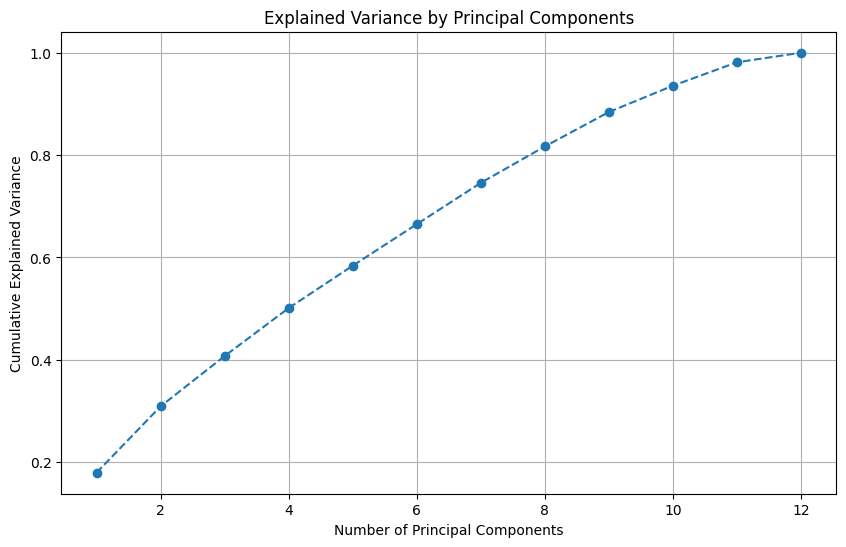

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,track_name
0,-1.540142,-0.527212,-0.794832,-0.467113,-0.821369,-0.721476,-0.400812,0.162239,0.753893,0.163250,-0.609126,I Don't Care (with Justin Bieber) - Loud Luxur...
1,-1.090017,-0.879849,0.171874,-0.145500,0.558518,-0.139155,-1.458208,1.670500,0.978191,-0.544554,0.014759,Memories - Dillon Francis Remix
2,-1.638837,-0.643873,-0.350666,0.007159,-0.955531,-0.377351,-0.459231,-0.662937,-1.440905,0.354822,0.152814,All the Time - Don Diablo Remix
3,-1.589418,0.021349,-0.307678,0.374661,-0.716976,-0.039261,-0.811501,0.020786,1.181187,-0.481637,-0.550137,Call You Mine - Keanu Silva Remix
4,-1.073438,-0.338581,-1.829808,-0.354135,-0.551872,-0.583170,-0.157899,0.230153,-0.434586,0.139931,0.353810,Someone You Loved - Future Humans Remix


Reduced data shape: (32833, 11)
Number of principal components retained: 11


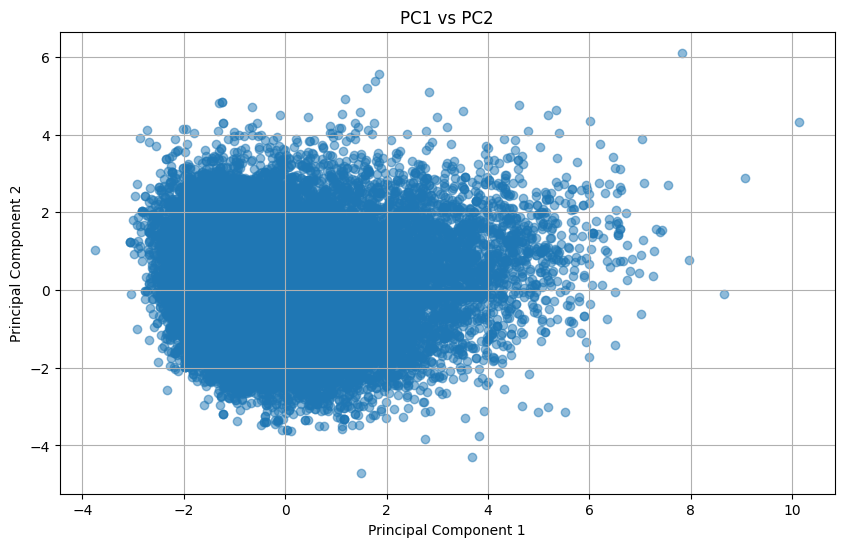

In [6]:
# TODO: Write your code here
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Retain only the relevant features for PCA
relevant_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_relevant)

# Apply PCA
pca = PCA()
pca.fit(scaled_data)

# Plot the explained variance ratio to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components to retain
cut_off = 0.95  # For example, retain 95% of variance
n_components = next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= cut_off) + 1

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(scaled_data)


num_components = min(13, next(i for i, cumulative_variance in enumerate(cumulative_explained_variance) if cumulative_variance >= 0.95) + 1)
df_reduced = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components)])
df_reduced['track_name'] = track_names.values
display(df_reduced.head())

# Display the reduced data shape
print(f'Reduced data shape: {reduced_data.shape}')
print(f'Number of principal components retained: {n_components}')


# plot of the first two principal components
plt.figure(figsize=(10, 6))
codes_positions_pc1 = 0  # Replace with the actual position of 'PC1'
codes_positions_pc2 = 1  # Replace with the actual position of 'PC2'
plt.scatter(reduced_data[:, codes_positions_pc1], reduced_data[:, codes_positions_pc2], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PC1 vs PC2')
plt.grid(True)
plt.show()





# Clustering

Implement K-means for clustering from scratch.

<ipython-input-52-91466662209a>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['cluster'] = labels


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,1.0
1,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,1.0
2,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,1.0
3,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,0.0
4,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,1.0


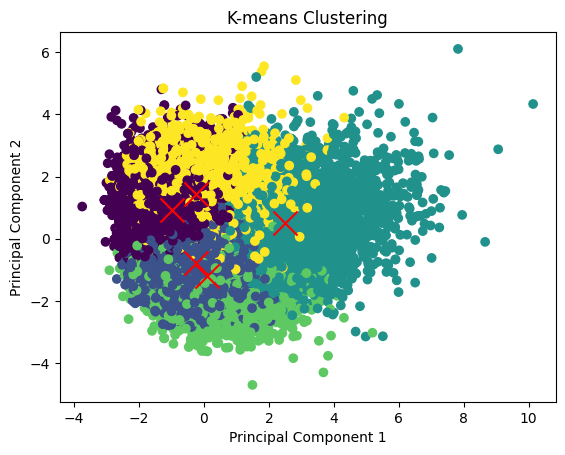

In [52]:
# TODO: Write your code here

import numpy as np
import pandas as pd

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means clustering algorithm
class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly from the dataset
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            self.clusters = self._create_clusters(X)

            # Calculate new centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for cluster_idx, cluster in enumerate(self.clusters):
                new_centroids[cluster_idx] = np.mean(cluster, axis=0)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Assign final clusters
        self.labels_ = self._get_labels(X)

    def _create_clusters(self, X):
        clusters = [[] for _ in range(self.n_clusters)]
        for point in X:
            centroid_idx = self._closest_centroid(point)
            clusters[centroid_idx].append(point)
        return [np.array(cluster) for cluster in clusters]

    def _closest_centroid(self, point):
        distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def _get_labels(self, X):
        labels = np.zeros(len(X))
        for idx, point in enumerate(X):
            labels[idx] = self._closest_centroid(point)
        return labels

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Retain only the relevant features for clustering
relevant_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_relevant)

# Apply PCA to reduce dimensions (optional step)
from sklearn.decomposition import PCA
pca = PCA(n_components=12)  # Adjust the number of components as needed
reduced_data = pca.fit_transform(scaled_data)

# Initialize and fit K-means
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(reduced_data)

# Retrieve the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_relevant['cluster'] = labels

# Display the first few rows of the DataFrame with cluster labels
display(df_relevant.head())

# Plot the clusters (for visualization if reduced to 2D)
import matplotlib.pyplot as plt

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red',marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

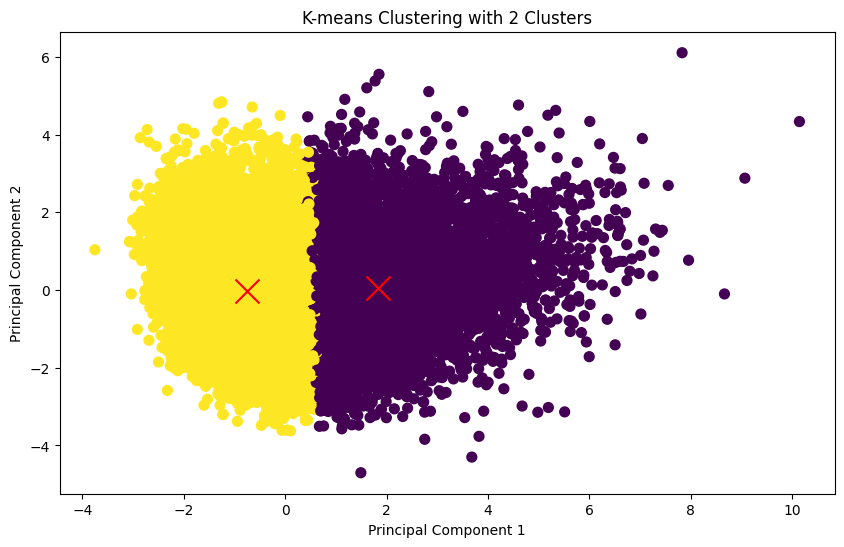

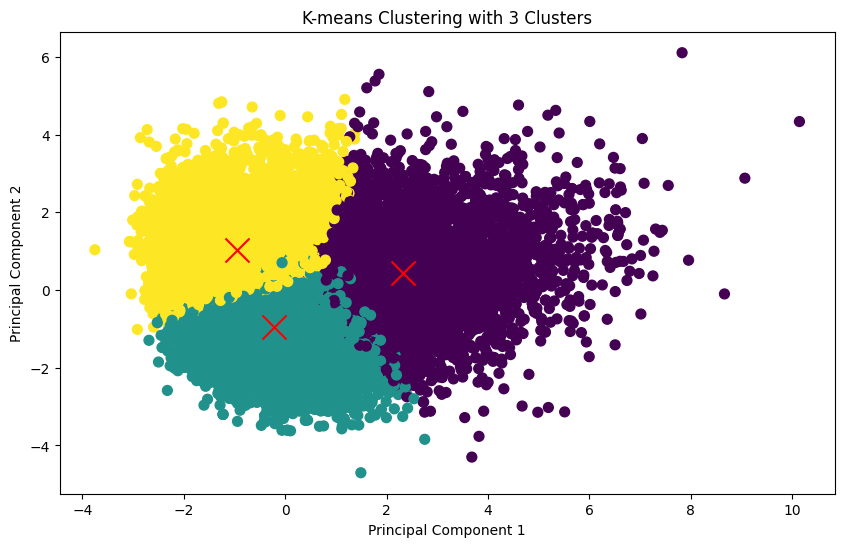

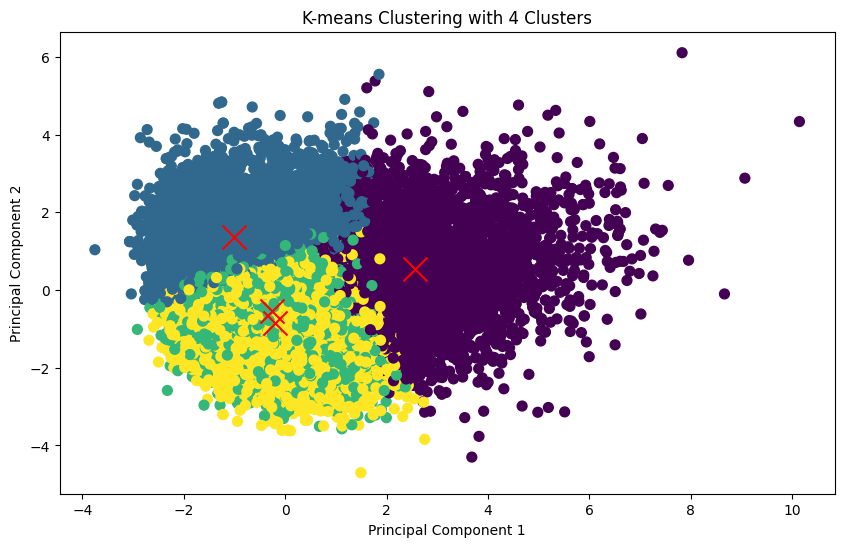

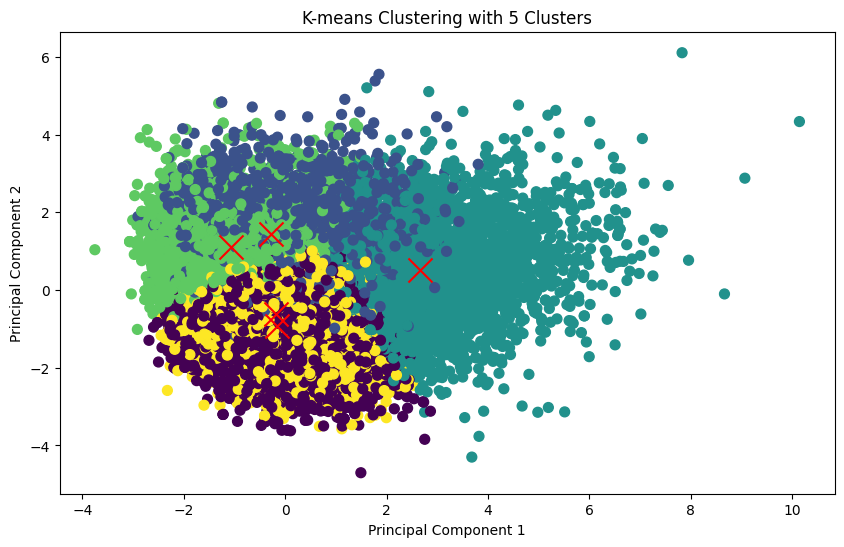

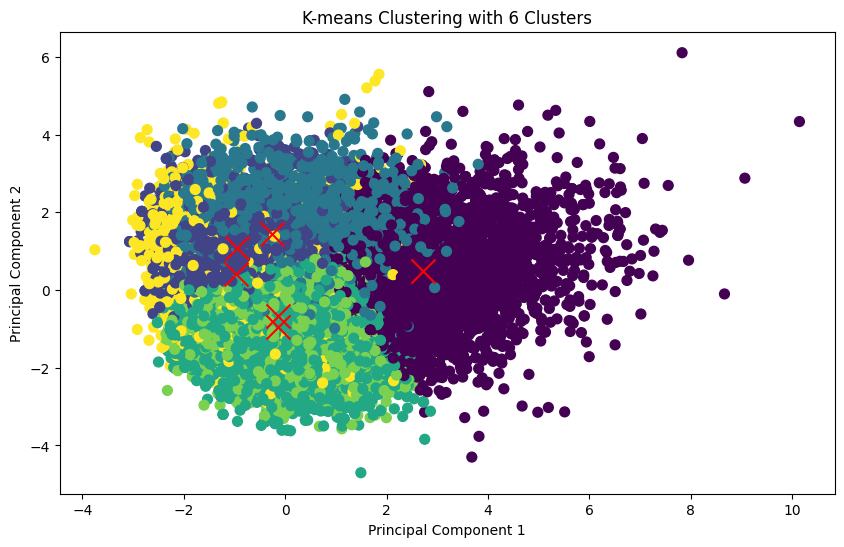

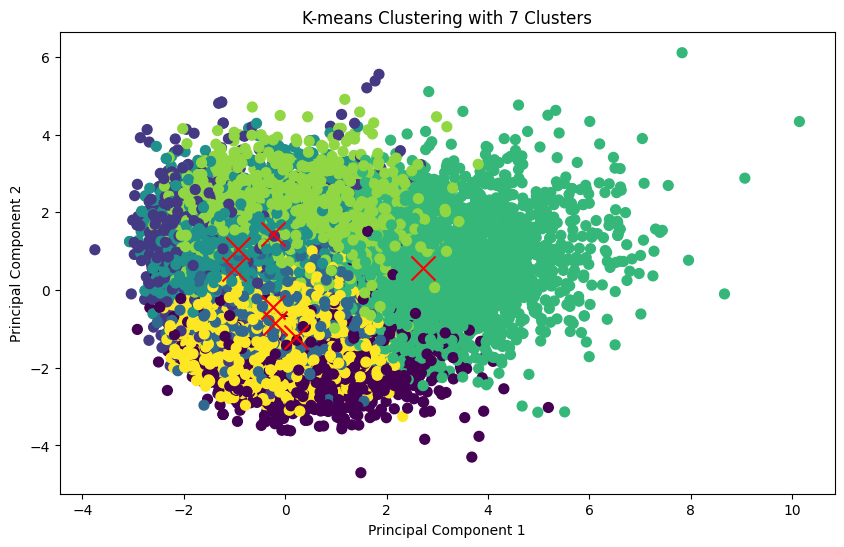

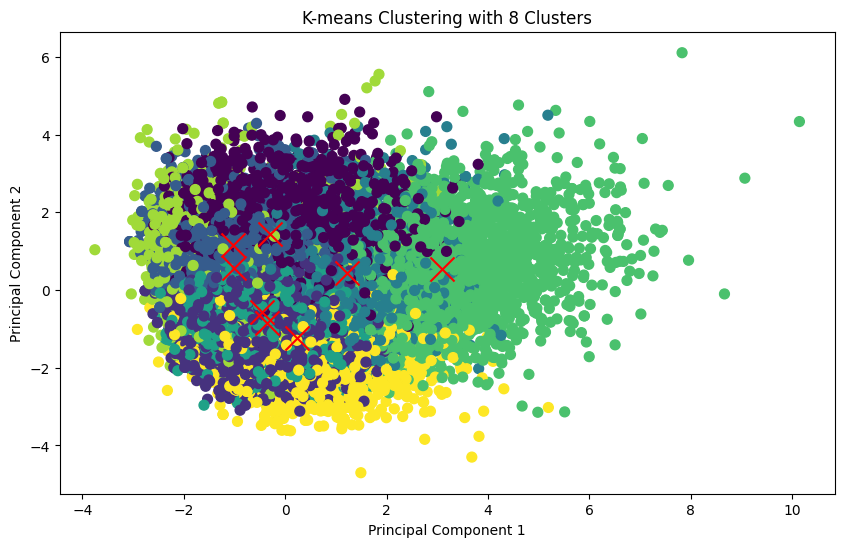

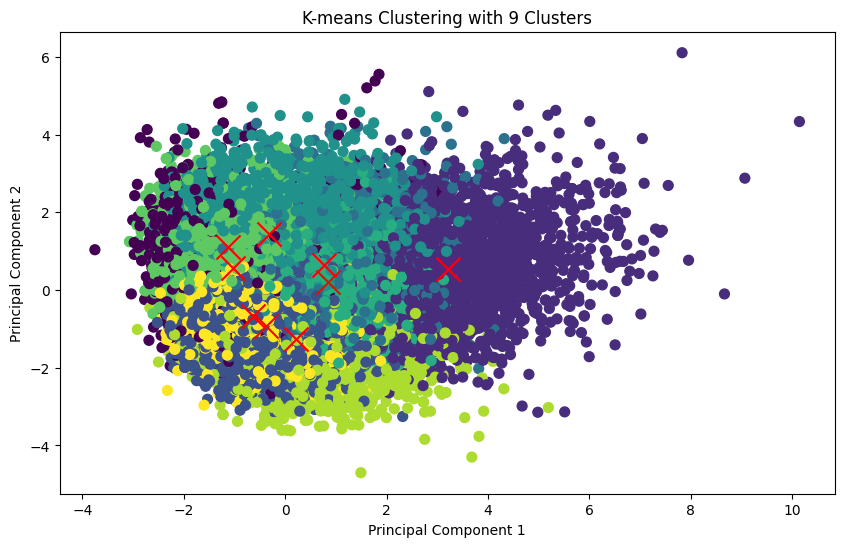

In [ ]:
# TODO: Write your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# K-means clustering algorithm
class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly from the dataset
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Assign clusters
            self.clusters = self._create_clusters(X)

            # Calculate new centroids
            new_centroids = np.zeros((self.n_clusters, n_features))
            for cluster_idx, cluster in enumerate(self.clusters):
                new_centroids[cluster_idx] = np.mean(cluster, axis=0)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

        # Assign final clusters
        self.labels_ = self._get_labels(X)

    def _create_clusters(self, X):
        clusters = [[] for _ in range(self.n_clusters)]
        for point in X:
            centroid_idx = self._closest_centroid(point)
            clusters[centroid_idx].append(point)
        return [np.array(cluster) for cluster in clusters]

    def _closest_centroid(self, point):
        distances = [euclidean_distance(point, centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def _get_labels(self, X):
        labels = np.zeros(len(X))
        for idx, point in enumerate(X):
            labels[idx] = self._closest_centroid(point)
        return labels

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Retain only the relevant features for clustering
relevant_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_relevant)

# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Reduce to 2 components for plotting
reduced_data = pca.fit_transform(scaled_data)

# Function to run K-means and plot the clusters
def run_kmeans_and_plot(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    labels = kmeans.labels_

    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red', marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'K-means Clustering with {n_clusters} Clusters')
    plt.show()

# Run K-means for number of clusters ranging from 2 to 9 and plot the results
for n_clusters in range(2, 10):
    run_kmeans_and_plot(n_clusters, reduced_data)


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

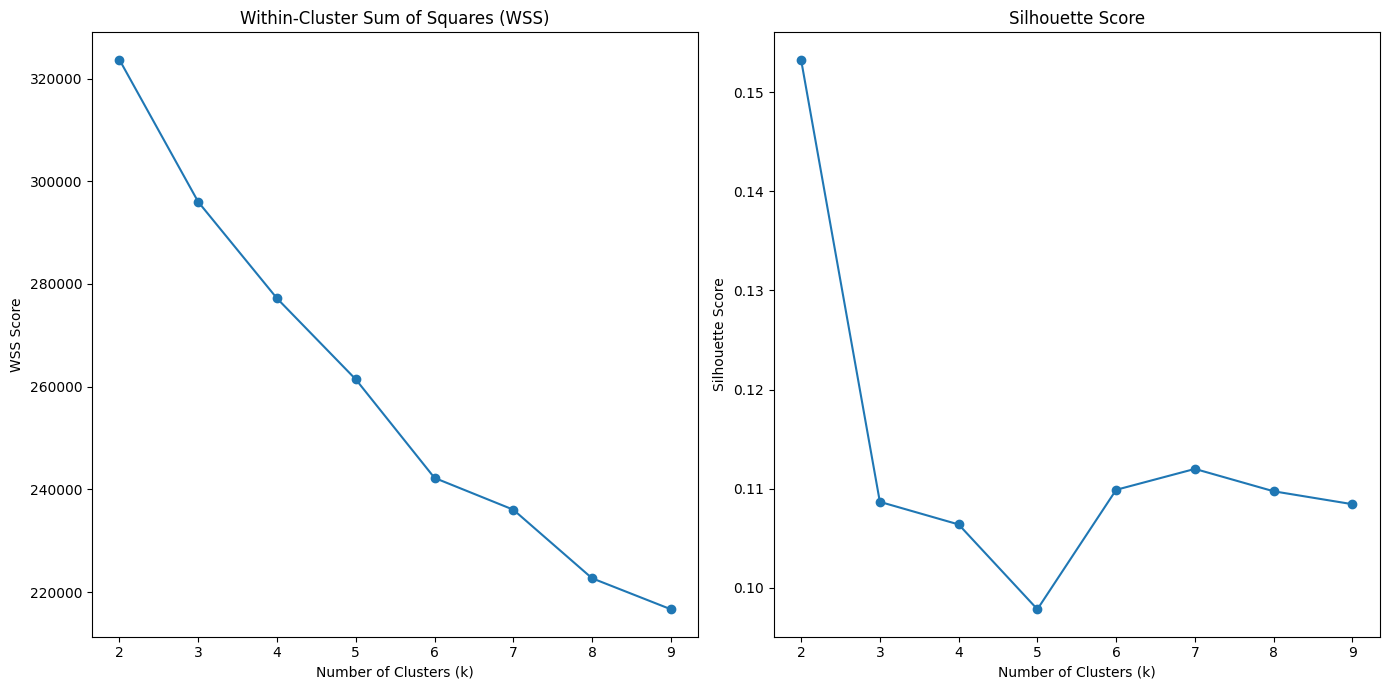

The optimal number of clusters is: 2


In [ ]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Lists to store WSS and Silhouette scores
wss_scores = []
silhouette_scores = []

# Calculate WSS and Silhouette score for different number of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reduced_data)
    labels = kmeans.labels_

    # Calculate WSS
    wss = 0
    for i, cluster in enumerate(kmeans.clusters):
        wss += np.sum((cluster - kmeans.centroids[i]) ** 2)
    wss_scores.append(wss)

    # Calculate Silhouette score
    silhouette_avg = silhouette_score(reduced_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plot WSS scores
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wss_scores, marker='o')
plt.title('Within-Cluster Sum of Squares (WSS)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WSS Score')

# Plot Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Determine the optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2
print(f'The optimal number of clusters is: {optimal_clusters}')


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

<ipython-input-10-7d752a0e15e8>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['cluster'] = labels


Cluster 0: Distance between selected songs = 108746.00163783443
Cluster 1: Distance between selected songs = 4135.003676886157
Cluster 2: Distance between selected songs = 63960.01469345182
Cluster 3: Distance between selected songs = 40891.00001554404
Cluster 4: Distance between selected songs = 27317.02563861176


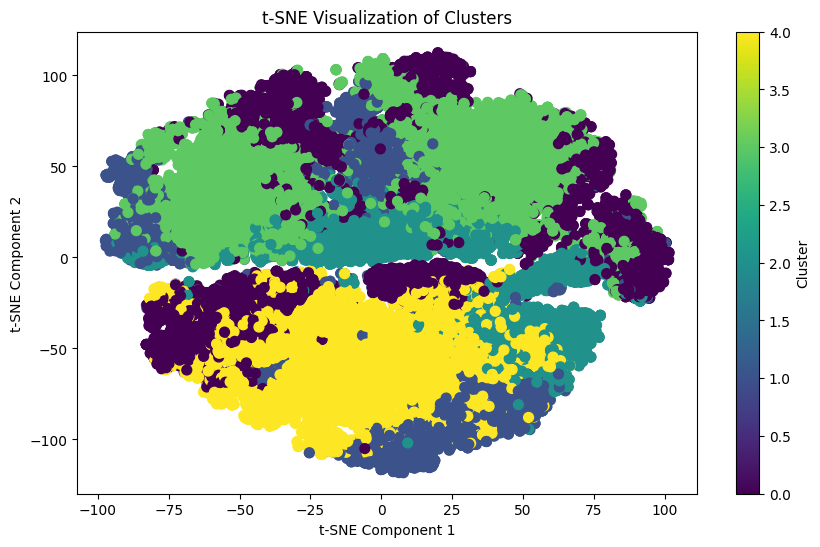

In [ ]:
# TODO: Write your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random


# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Retain only the relevant features for clustering
relevant_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_relevant)

# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Reduce to 10 components for better representation
pca_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters (this should be determined previously using silhouette or WSS scores)
optimal_clusters = 5  # Example value; replace with the actual optimal number of clusters

# Run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_relevant['cluster'] = labels

# Function to select two random songs from each cluster and check their similarity
def sample_check(df, n_clusters):
    sample_pairs = []
    for cluster in range(n_clusters):
        cluster_data = df[df['cluster'] == cluster]
        if len(cluster_data) < 2:
            continue
        sample_pair = cluster_data.sample(n=2, random_state=42)
        sample_pairs.append(sample_pair)
        song1, song2 = sample_pair.iloc[0], sample_pair.iloc[1]
        distance = euclidean_distance(song1[:-1], song2[:-1])  # Exclude the cluster label
        print(f'Cluster {cluster}: Distance between selected songs = {distance}')

# Perform the sample check
sample_check(df_relevant, optimal_clusters)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for the reduced data
columns = ['PC' + str(i + 1) for i in range(10)]
df_reduced = pd.DataFrame(reduced_data, columns=columns)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def initialize_centroids(X, k):
    np.random.seed(42)
    initial_idx = np.random.choice(range(X.shape[0]))
    centroids = [X[initial_idx]]

    for _ in range(1, k):
        distances = np.min(np.array([np.linalg.norm(X - c, axis=1) for c in centroids]), axis=0)
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()

        for idx, prob in enumerate(cumulative_probabilities):
            if r < prob:
                centroids.append(X[idx])
                break

    return np.array(centroids)

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

def sample_check(df, k):
    samples = []

    for cluster in range(k):
        cluster_songs = df[df['cluster'] == cluster]

        if len(cluster_songs) >= 2:
            samples.append(cluster_songs.sample(2))

    return samples

# Perform K-means clustering for k values from 2 to 9
for k in range(2, 10):
    centroids, labels = k_means(reduced_data, k)
    df_reduced['cluster'] = labels
    samples = sample_check(df_reduced, k)

    # Print sample songs and calculate distances
    for i, s in enumerate(samples):
        print(f"Cluster {i} samples:\n", s, "\n")

        song1, song2 = s.iloc[0], s.iloc[1]
        distance = np.linalg.norm(song1[['PC1', 'PC2']].values - song2[['PC1', 'PC2']].values)
        print(f"Distance between two songs in Cluster {i}: {distance}")


Cluster 0 samples:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
27036  2.701428 -1.369662 -0.190361  1.788615 -0.212190  0.774620 -0.119667   
16713  4.304922 -0.383996 -1.695844  1.402106 -0.586308  0.085356  0.694326   

            PC8       PC9      PC10  cluster  
27036  0.288504  1.388366  0.378214        0  
16713  0.300602 -0.592973  0.061830        0   

Cluster 1 samples:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
397   -0.939731  0.419895  0.174362  0.148302  0.297132  0.136531 -0.868350   
29607 -0.749798  0.409405 -0.497606  0.645840  0.389727 -0.661592 -1.087277   

            PC8       PC9      PC10  cluster  
397    0.427599  1.198234 -1.124849        1  
29607  1.060546  0.392188  0.596896        1   

Distance between two songs in Cluster 0: 1.8822141423766248
Distance between two songs in Cluster 1: 0.19022251978053067
Cluster 0 samples:
             PC1       PC2       PC3       PC4       PC5  

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

<ipython-input-11-b74d43df979f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['cluster'] = labels


Cluster 0: Distance between selected songs = 42053.032452943866
Cluster 1: Distance between selected songs = 42071.00061749117
Cluster 2: Distance between selected songs = 26408.021964833875
Cluster 3: Distance between selected songs = 147893.00013198057
Cluster 4: Distance between selected songs = 111293.00030278019


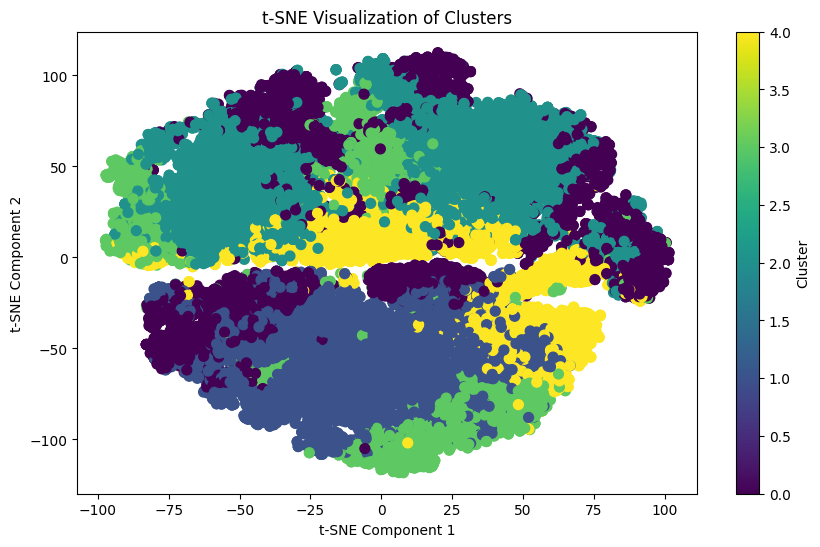

In [ ]:
# TODO: Write your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Load the data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify.csv')

# Retain only the relevant features for clustering
relevant_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                     'valence', 'tempo', 'duration_ms']

# Filter the DataFrame to include only these columns
df_relevant = df[relevant_features]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_relevant)

# Apply PCA to reduce dimensions
pca = PCA(n_components=10)  # Reduce to 10 components for better representation
pca_data = pca.fit_transform(scaled_data)

# Determine the optimal number of clusters (this should be determined previously using silhouette or WSS scores)
optimal_clusters = 5  # Example value; replace with the actual optimal number of clusters

# Run K-means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(pca_data)
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df_relevant['cluster'] = labels

# Function to select two random songs from each cluster and check their similarity
def sample_check(df, n_clusters):
    sample_pairs = []
    for cluster in range(n_clusters):
        cluster_data = df[df['cluster'] == cluster]
        if len(cluster_data) < 2:
            continue
        sample_pair = cluster_data.sample(n=2, random_state=42)
        sample_pairs.append(sample_pair)
        song1, song2 = sample_pair.iloc[0], sample_pair.iloc[1]
        distance = euclidean_distance(song1[:-1], song2[:-1])  # Exclude the cluster label
        print(f'Cluster {cluster}: Distance between selected songs = {distance}')

# Perform the sample check
sample_check(df_relevant, optimal_clusters)

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(pca_data)

# Plot t-SNE visualization
plt.figure(figsize=(10, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


<ipython-input-14-af33da770228>:43: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='viridis', edgecolor='r', s=60, marker='x')


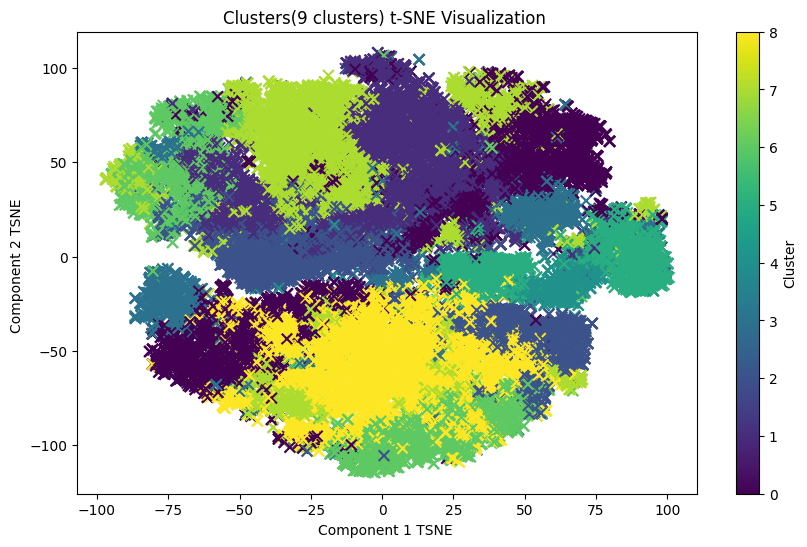

In [14]:
from sklearn.manifold import TSNE
def initialize_centroids(X, k):
    np.random.seed(42)
    centroids = [X[np.random.choice(range(X.shape[0]))]]
    for _ in range(1, k):
        distances = np.min([np.linalg.norm(X - centroid, axis=1) for centroid in centroids], axis=0)
        probabilities = distances / distances.sum()
        cumulative_probabilities = probabilities.cumsum()
        r = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if r < p:
                centroids.append(X[j])
                break
    return np.array(centroids)
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)
def update_centroids(X, labels, k):
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_numerical_features)

df_tsne = pd.DataFrame(tsne_features, columns=['TSNE1', 'TSNE2'])

centroids, labels = k_means(reduced_data, 9)
df_tsne['cluster'] = labels


plt.figure(figsize=(10, 6))
plt.scatter(df_tsne['TSNE1'], df_tsne['TSNE2'], c=df_tsne['cluster'], cmap='viridis', edgecolor='r', s=60, marker='x')
plt.xlabel('Component 1 TSNE ')
plt.ylabel('Component 2 TSNE ')
plt.title('Clusters(9 clusters) t-SNE Visualization ')
plt.colorbar(label='Cluster')
plt.show()